In [53]:

import pandas as pd, matplotlib.pyplot as plt
import re, requests
from ast import literal_eval
corpora = dict(eng_2019=26, eng_us_2019=28, eng_gb_2019=29, eng_fiction_2019=27,
               chi_sim_2019=34, fre_2019=30, ger_2019=31, heb_2019=35,
               ita_2019=33, rus_2019=36, spa_2019=32,          
               eng_us_2012=17, eng_us_2009=5, eng_gb_2012=18, eng_gb_2009=6,
               chi_sim_2012=23, chi_sim_2009=11, eng_2012=15, eng_2009=0,
               eng_fiction_2012=16, eng_fiction_2009=4, eng_1m_2009=1,
               fre_2012=19, fre_2009=7, ger_2012=20, ger_2009=8, heb_2012=24,
               heb_2009=9, spa_2012=21, spa_2009=10, rus_2012=25, rus_2009=12,
               ita_2012=22)
def GoogleNgrams(A, B = 1800, C = 2019, D = 'eng_2019'):
    search = dict(content=A, year_start=B, year_end=C,
                  corpus=corpora[D])
    a = requests.get('http://books.google.com/ngrams/graph', params=search)
    b = literal_eval(re.findall('ngrams.data = (.*?);\\n', a.text)[0])
    c = pd.DataFrame({i['ngram']: i['timeseries'] for i in b},
                 index = range(search['year_start'],
                               search['year_end']+1))
    return(c)


In [2]:
b = pd.read_csv('EU_painters.txt', header = None, names = ['EU_painters'])
b.head(6)

,EU_painters
0,Pablo Picasso
1,Marc Chagall
2,Wassily Kandinsky
3,Henri Matisse
4,Paul Gauguin
5,Piet Mondrian


In [105]:
type(b)

pandas.core.frame.DataFrame

In [3]:
painters = ''
for i in b['EU_painters'].values:
    painters = painters + str(i) +','
painters

'Pablo Picasso,Marc Chagall,Wassily Kandinsky,Henri Matisse,Paul Gauguin,Piet Mondrian,'

In [4]:
eng = GoogleNgrams(painters,1900,1960)
eng.shape


(61, 6)

In [5]:
eng.head()

,Pablo Picasso,Marc Chagall,Wassily Kandinsky,Henri Matisse,Paul Gauguin,Piet Mondrian
1900,2.453135e-10,1.226279e-10,3.088335e-11,3.036890e-10,2.711678e-10,0.000000e+00
1901,1.962508e-10,9.810233e-11,2.470668e-11,2.429512e-10,3.308794e-10,0.000000e+00
1902,4.115246e-10,5.967920e-10,2.058890e-11,3.550638e-10,5.618662e-10,3.815111e-11
1903,3.678643e-10,5.115360e-10,1.764763e-11,3.194693e-10,5.572443e-10,3.270095e-11
1904,2.920831e-10,4.585931e-10,3.010464e-11,3.692974e-10,5.847536e-10,3.270095e-11


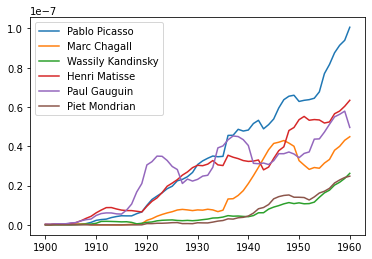

In [6]:
eng.plot()

In [7]:
ger = GoogleNgrams(painters,1900, 1960, 'ger_2019')
ger.shape

(61, 6)

In [99]:
ger.head()

,Pablo Picasso,Marc Chagall,Wassily Kandinsky,Henri Matisse,Paul Gauguin,Piet Mondrian
1900,2.875549e-10,1.479207e-10,1.593368e-09,1.396341e-10,2.626670e-10,0.0
1901,2.300439e-10,1.183366e-10,1.464251e-09,1.117073e-10,1.916148e-09,0.0
1902,1.917033e-10,9.861383e-11,1.607033e-09,9.308943e-11,1.751519e-09,0.0
1903,1.643171e-10,8.452614e-11,1.438754e-09,2.636819e-10,2.972430e-09,0.0
1904,7.979094e-11,0.000000e+00,1.499623e-09,5.071596e-10,4.737644e-09,0.0


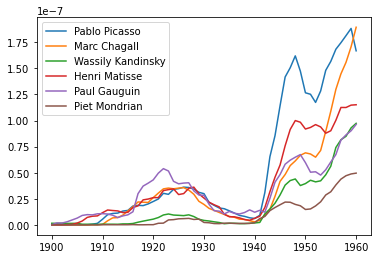

In [98]:
ger.plot()

In [155]:
fre = GoogleNgrams(painters,1900, 1960, 'fre_2019')
fre.shape

(61, 6)

In [156]:
fre.head()

,Pablo Picasso,Marc Chagall,Wassily Kandinsky,Henri Matisse,Paul Gauguin,Piet Mondrian
1900,2.624756e-10,0.000000e+00,0.0,1.742823e-09,4.615933e-08,1.397185e-10
1901,2.099805e-10,0.000000e+00,0.0,8.381271e-09,4.789170e-08,1.117748e-10
1902,4.330217e-10,8.601265e-11,0.0,1.068294e-08,4.524253e-08,9.314565e-11
1903,3.711614e-10,7.372513e-11,0.0,1.408052e-08,5.840070e-08,7.983913e-11
1904,3.711614e-10,7.372513e-11,0.0,2.238254e-08,6.027716e-08,7.983913e-11


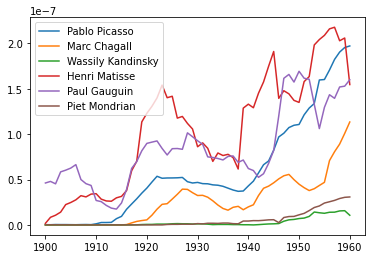

In [157]:
fre.plot()

In [101]:
df1 = pd.merge(eng,ger, left_index = True, right_index = True, suffixes = ['_eng', '_ger'])
df1.head()

,Pablo Picasso_eng,Marc Chagall_eng,Wassily Kandinsky_eng,Henri Matisse_eng,Paul Gauguin_eng,Piet Mondrian_eng,Pablo Picasso_ger,Marc Chagall_ger,Wassily Kandinsky_ger,Henri Matisse_ger,Paul Gauguin_ger,Piet Mondrian_ger
1900,2.453135e-10,1.226279e-10,3.088335e-11,3.036890e-10,2.711678e-10,0.000000e+00,2.875549e-10,1.479207e-10,1.593368e-09,1.396341e-10,2.626670e-10,0.0
1901,1.962508e-10,9.810233e-11,2.470668e-11,2.429512e-10,3.308794e-10,0.000000e+00,2.300439e-10,1.183366e-10,1.464251e-09,1.117073e-10,1.916148e-09,0.0
1902,4.115246e-10,5.967920e-10,2.058890e-11,3.550638e-10,5.618662e-10,3.815111e-11,1.917033e-10,9.861383e-11,1.607033e-09,9.308943e-11,1.751519e-09,0.0
1903,3.678643e-10,5.115360e-10,1.764763e-11,3.194693e-10,5.572443e-10,3.270095e-11,1.643171e-10,8.452614e-11,1.438754e-09,2.636819e-10,2.972430e-09,0.0
1904,2.920831e-10,4.585931e-10,3.010464e-11,3.692974e-10,5.847536e-10,3.270095e-11,7.979094e-11,0.000000e+00,1.499623e-09,5.071596e-10,4.737644e-09,0.0


In [102]:
df1.columns = pd.MultiIndex.from_product([['ENG', 'GER'], 
                                          ['Pablo Picasso','Marc Chagall','Wassily Kandinsky','Henri Matisse','Paul Gauguin','Piet Mondrian']],
                                         names = ['corpora','painter'])
df1.head()

corpora           ENG                                                \
painter Pablo Picasso  Marc Chagall Wassily Kandinsky Henri Matisse   
1900     2.453135e-10  1.226279e-10      3.088335e-11  3.036890e-10   
1901     1.962508e-10  9.810233e-11      2.470668e-11  2.429512e-10   
1902     4.115246e-10  5.967920e-10      2.058890e-11  3.550638e-10   
1903     3.678643e-10  5.115360e-10      1.764763e-11  3.194693e-10   
1904     2.920831e-10  4.585931e-10      3.010464e-11  3.692974e-10   

corpora                                       GER                \
painter  Paul Gauguin Piet Mondrian Pablo Picasso  Marc Chagall   
1900     2.711678e-10  0.000000e+00  2.875549e-10  1.479207e-10   
1901     3.308794e-10  0.000000e+00  2.300439e-10  1.183366e-10   
1902     5.618662e-10  3.815111e-11  1.917033e-10  9.861383e-11   
1903     5.572443e-10  3.270095e-11  1.643171e-10  8.452614e-11   
1904     5.847536e-10  3.270095e-11  7.979094e-11  0.000000e+00   

corpora                                                              
painter Wassily Kandinsky Henri Matisse  Paul Gauguin Piet Mondrian  
1900         1.593368e-09  1.396341e-10  2.626670e-10           0.0  
1901         1.464251e-09  1.117073e-10  1.916148e-09           0.0  
1902         1.607033e-09  9.308943e-11  1.751519e-09           0.0  
1903         1.438754e-09  2.636819e-10  2.972430e-09           0.0  
1904         1.499623e-09  5.071596e-10  4.737644e-09           0.0

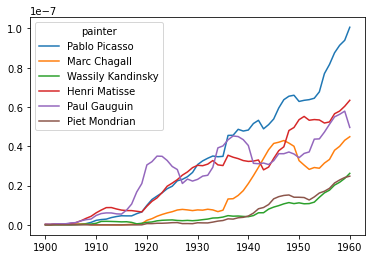

In [15]:
df1['ENG'].plot()

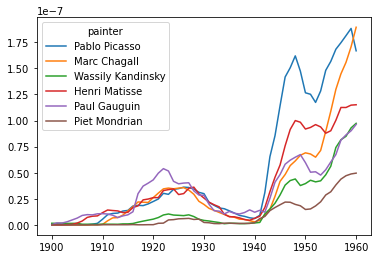

In [16]:
df1['GER'].plot()

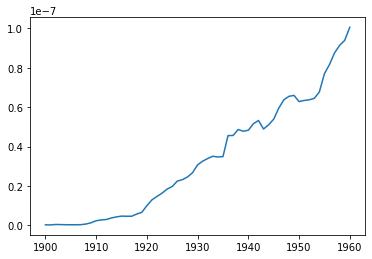

In [17]:
df1['ENG','Pablo Picasso'].plot()

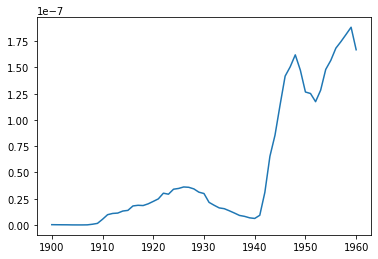

In [18]:
df1['GER','Pablo Picasso'].plot()

In [136]:
df1.groupby(level='corpora',axis=1).agg('median').head()

corpora,ENG,GER
1900,1.839707e-10,2.052939e-10
1901,1.471766e-10,1.741903e-10
1902,3.832942e-10,1.451585e-10
1903,3.436668e-10,2.139995e-10
1904,3.306903e-10,2.934753e-10


Text(0, 0.5, 'Median Regularity')

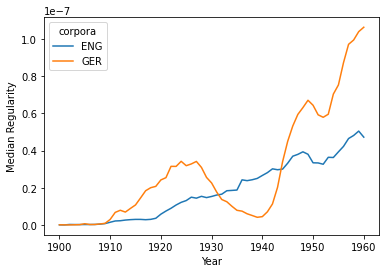

In [135]:
df1.groupby(level='corpora',axis=1).agg('median').plot()
plt.xlabel('Year')
plt.ylabel('Median Regularity')

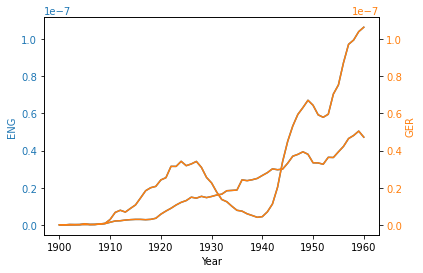

In [115]:
fig, ax1 = plt.subplots()
ax1.set_xlabel('Year')
ax1.set_ylabel('ENG', color = 'C0')
ax1.plot(df1.groupby(level='corpora',axis=1).agg('median'), color='C0')
ax1.tick_params(axis='y', labelcolor='C0')
ax2 = ax1.twinx() # 공유하기
ax2.set_ylabel('GER', color='C1')
ax2.plot(df1.groupby(level='corpora',axis=1).agg('median'),color='C1')
ax2.tick_params(axis='y', labelcolor='C1')

In [113]:
df1['ENG'].groupby(level='corpora',axis=1).agg('median')

ValueError: level name corpora is not the name of the columns

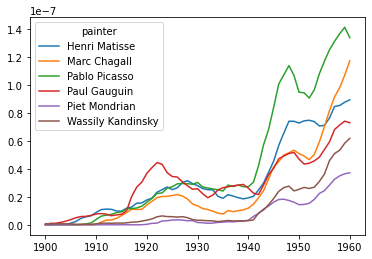

In [21]:
df1.groupby(level='painter',axis=1).median().plot()

In [22]:
df1['Decade'] = [str(i)[:-1]+'0' for i in df1.index]

In [23]:
df1

corpora           ENG                                                \
painter Pablo Picasso  Marc Chagall Wassily Kandinsky Henri Matisse   
1900     2.453135e-10  1.226279e-10      3.088335e-11  3.036890e-10   
1901     1.962508e-10  9.810233e-11      2.470668e-11  2.429512e-10   
1902     4.115246e-10  5.967920e-10      2.058890e-11  3.550638e-10   
1903     3.678643e-10  5.115360e-10      1.764763e-11  3.194693e-10   
1904     2.920831e-10  4.585931e-10      3.010464e-11  3.692974e-10   
...               ...           ...               ...           ...   
1956     8.167826e-08  3.333030e-08      1.769535e-08  5.242140e-08   
1957     8.761289e-08  3.800443e-08      2.027726e-08  5.659492e-08   
1958     9.142000e-08  4.000580e-08      2.171076e-08  5.794948e-08   
1959     9.396382e-08  4.308033e-08      2.365222e-08  6.039588e-08   
1960     1.006188e-07  4.489735e-08      2.625029e-08  6.343563e-08   

corpora                                       GER                \
painter  Paul Gauguin Piet Mondrian Pablo Picasso  Marc Chagall   
1900     2.711678e-10  0.000000e+00  2.875549e-10  1.479207e-10   
1901     3.308794e-10  0.000000e+00  2.300439e-10  1.183366e-10   
1902     5.618662e-10  3.815111e-11  1.917033e-10  9.861383e-11   
1903     5.572443e-10  3.270095e-11  1.643171e-10  8.452614e-11   
1904     5.847536e-10  3.270095e-11  7.979094e-11  0.000000e+00   
...               ...           ...           ...           ...   
1956     5.123033e-08  1.862868e-08  1.683209e-07  1.298531e-07   
1957     5.500416e-08  2.133998e-08  1.745827e-07  1.447616e-07   
1958     5.629554e-08  2.287716e-08  1.813513e-07  1.557751e-07   
1959     5.791014e-08  2.413338e-08  1.882522e-07  1.706578e-07   
1960     4.960043e-08  2.481577e-08  1.668192e-07  1.893926e-07   

corpora                                                             Decade  
painter Wassily Kandinsky Henri Matisse  Paul Gauguin Piet Mondrian         
1900         1.593368e-09  1.396341e-10  2.626670e-10  0.000000e+00   1900  
1901         1.464251e-09  1.117073e-10  1.916148e-09  0.000000e+00   1900  
1902         1.607033e-09  9.308943e-11  1.751519e-09  0.000000e+00   1900  
1903         1.438754e-09  2.636819e-10  2.972430e-09  0.000000e+00   1900  
1904         1.499623e-09  5.071596e-10  4.737644e-09  0.000000e+00   1900  
...                   ...           ...           ...           ...    ...  
1956         7.416429e-08  1.002349e-07  6.738291e-08  3.828135e-08   1950  
1957         8.159537e-08  1.125348e-07  8.122296e-08  4.389905e-08   1950  
1958         8.491643e-08  1.125064e-07  8.625405e-08  4.713973e-08   1950  
1959         9.296983e-08  1.147666e-07  9.020925e-08  4.882844e-08   1950  
1960         9.733196e-08  1.151377e-07  9.629616e-08  4.961954e-08   1960  

[61 rows x 13 columns]

In [24]:
df1.groupby(by=df1.Decade,axis=0).median().head()

corpora           ENG                                                \
painter Pablo Picasso  Marc Chagall Wassily Kandinsky Henri Matisse   
Decade                                                                
1900     3.097178e-10  4.484191e-10      3.049400e-11  5.633328e-10   
1910     4.432543e-09  4.002589e-11      1.582483e-09  7.424314e-09   
1920     1.906370e-08  6.414474e-09      2.213583e-09  2.048965e-08   
1930     3.498624e-08  7.811362e-09      3.801588e-09  3.184977e-08   
1940     5.358133e-08  3.915192e-08      8.563703e-09  3.345521e-08   

corpora                                       GER                \
painter  Paul Gauguin Piet Mondrian Pablo Picasso  Marc Chagall   
Decade                                                            
1900     7.945899e-10  3.270095e-11  1.780102e-10  9.156999e-11   
1910     6.103274e-09  1.430488e-11  1.358316e-08  1.137063e-08   
1920     3.013263e-08  7.668478e-10  3.264295e-08  3.394428e-08   
1930     3.971132e-08  2.090768e-09  1.450737e-08  9.086802e-09   
1940     3.439738e-08  1.182609e-08  9.982220e-08  3.454613e-08   

corpora                                                              
painter Wassily Kandinsky Henri Matisse  Paul Gauguin Piet Mondrian  
Decade                                                               
1900         1.451503e-09  1.128765e-09  5.629232e-09  0.000000e+00  
1910         9.873081e-10  1.403974e-08  1.060731e-08  1.775584e-10  
1920         9.054490e-09  3.145123e-08  4.107480e-08  5.139714e-09  
1930         1.571462e-09  9.063027e-09  1.306203e-08  1.430501e-09  
1940         2.474889e-08  5.153855e-08  4.458903e-08  1.751519e-08

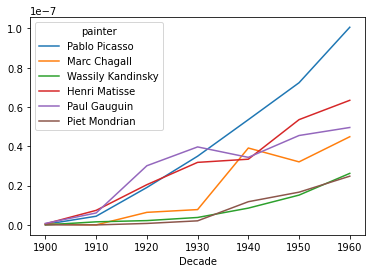

In [25]:
df1['ENG'].groupby(by=df1.Decade,axis=0).agg('median').plot()

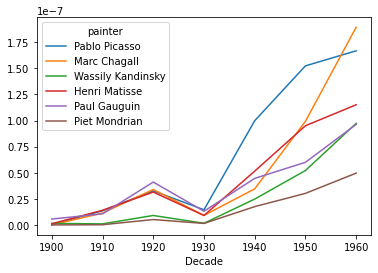

In [26]:
df1['GER'].groupby(by=df1.Decade,axis=0).agg('median').plot()

In [27]:
df1.groupby(by=df1.Decade,axis=0).agg(['mean','median',lambda x:x.max()-x.min()]).head()

ENG                                                          \
       Pablo Picasso                              Marc Chagall                 
                mean        median    <lambda_0>          mean        median   
Decade                                                                         
1900    4.334333e-10  3.097178e-10  1.094637e-09  3.634386e-10  4.484191e-10   
1910    4.219084e-09  4.432543e-09  4.275568e-09  1.711434e-10  4.002589e-11   
1920    1.889082e-08  1.906370e-08  1.674826e-08  5.849964e-09  6.414474e-09   
1930    3.895549e-08  3.498624e-08  1.795091e-08  1.040422e-08  7.811362e-09   
1940    5.618035e-08  5.358133e-08  1.770850e-08  3.557231e-08  3.915192e-08   

                                                                    \
                     Wassily Kandinsky                               
          <lambda_0>              mean        median    <lambda_0>   
Decade                                                               
1900    5.567661e-10      1.388544e-10  3.049400e-11  4.233915e-10   
1910    6.545954e-10      1.371171e-09  1.582483e-09  1.288861e-09   
1920    5.564031e-09      2.111597e-09  2.213583e-09  1.245167e-09   
1930    1.067872e-08      3.710306e-09  3.801588e-09  2.382912e-09   
1940    2.191249e-08      8.120341e-09  8.563703e-09  7.175617e-09   

                      ...               GER                              \
       Henri Matisse  ... Wassily Kandinsky Henri Matisse                 
                mean  ...        <lambda_0>          mean        median   
Decade                ...                                                 
1900    1.334201e-09  ...      1.166675e-09  3.081565e-09  1.128765e-09   
1910    7.513652e-09  ...      3.979790e-09  1.607595e-08  1.403974e-08   
1920    1.971668e-08  ...      5.032676e-09  3.135949e-08  3.145123e-08   
1930    3.214093e-08  ...      3.171427e-09  1.262888e-08  9.063027e-09   
1940    3.643952e-08  ...      4.213866e-08  5.318834e-08  5.153855e-08   

                                                                              \
                      Paul Gauguin                             Piet Mondrian   
          <lambda_0>          mean        median    <lambda_0>          mean   
Decade                                                                         
1900    8.545366e-09  5.735951e-09  5.629232e-09  1.039583e-08  0.000000e+00   
1910    1.307763e-08  1.756739e-08  1.060731e-08  3.293457e-08  1.842208e-10   
1920    1.006502e-08  4.211707e-08  4.107480e-08  2.526762e-08  4.223488e-09   
1930    2.127177e-08  1.462854e-08  1.306203e-08  1.789753e-08  1.601520e-09   
1940    9.366882e-08  4.054521e-08  4.458903e-08  5.522183e-08  1.476248e-08   

                                    
                                    
              median    <lambda_0>  
Decade                              
1900    0.000000e+00  0.000000e+00  
1910    1.775584e-10  1.775584e-10  
1920    5.139714e-09  6.052165e-09  
1930    1.430501e-09  1.152798e-09  
1940    1.751519e-08  1.973058e-08  

[5 rows x 36 columns]

In [28]:
df1

corpora           ENG                                                \
painter Pablo Picasso  Marc Chagall Wassily Kandinsky Henri Matisse   
1900     2.453135e-10  1.226279e-10      3.088335e-11  3.036890e-10   
1901     1.962508e-10  9.810233e-11      2.470668e-11  2.429512e-10   
1902     4.115246e-10  5.967920e-10      2.058890e-11  3.550638e-10   
1903     3.678643e-10  5.115360e-10      1.764763e-11  3.194693e-10   
1904     2.920831e-10  4.585931e-10      3.010464e-11  3.692974e-10   
...               ...           ...               ...           ...   
1956     8.167826e-08  3.333030e-08      1.769535e-08  5.242140e-08   
1957     8.761289e-08  3.800443e-08      2.027726e-08  5.659492e-08   
1958     9.142000e-08  4.000580e-08      2.171076e-08  5.794948e-08   
1959     9.396382e-08  4.308033e-08      2.365222e-08  6.039588e-08   
1960     1.006188e-07  4.489735e-08      2.625029e-08  6.343563e-08   

corpora                                       GER                \
painter  Paul Gauguin Piet Mondrian Pablo Picasso  Marc Chagall   
1900     2.711678e-10  0.000000e+00  2.875549e-10  1.479207e-10   
1901     3.308794e-10  0.000000e+00  2.300439e-10  1.183366e-10   
1902     5.618662e-10  3.815111e-11  1.917033e-10  9.861383e-11   
1903     5.572443e-10  3.270095e-11  1.643171e-10  8.452614e-11   
1904     5.847536e-10  3.270095e-11  7.979094e-11  0.000000e+00   
...               ...           ...           ...           ...   
1956     5.123033e-08  1.862868e-08  1.683209e-07  1.298531e-07   
1957     5.500416e-08  2.133998e-08  1.745827e-07  1.447616e-07   
1958     5.629554e-08  2.287716e-08  1.813513e-07  1.557751e-07   
1959     5.791014e-08  2.413338e-08  1.882522e-07  1.706578e-07   
1960     4.960043e-08  2.481577e-08  1.668192e-07  1.893926e-07   

corpora                                                             Decade  
painter Wassily Kandinsky Henri Matisse  Paul Gauguin Piet Mondrian         
1900         1.593368e-09  1.396341e-10  2.626670e-10  0.000000e+00   1900  
1901         1.464251e-09  1.117073e-10  1.916148e-09  0.000000e+00   1900  
1902         1.607033e-09  9.308943e-11  1.751519e-09  0.000000e+00   1900  
1903         1.438754e-09  2.636819e-10  2.972430e-09  0.000000e+00   1900  
1904         1.499623e-09  5.071596e-10  4.737644e-09  0.000000e+00   1900  
...                   ...           ...           ...           ...    ...  
1956         7.416429e-08  1.002349e-07  6.738291e-08  3.828135e-08   1950  
1957         8.159537e-08  1.125348e-07  8.122296e-08  4.389905e-08   1950  
1958         8.491643e-08  1.125064e-07  8.625405e-08  4.713973e-08   1950  
1959         9.296983e-08  1.147666e-07  9.020925e-08  4.882844e-08   1950  
1960         9.733196e-08  1.151377e-07  9.629616e-08  4.961954e-08   1960  

[61 rows x 13 columns]

In [44]:
Sup_index_ENG = df1['ENG'].loc['1933':'1945'].agg('mean') / pd.concat([df1['ENG'].loc['1922':'1932'], df1['ENG'].loc['1946':'1956']],axis = 0).agg('mean')
Sup_index_ENG

painter
Pablo Picasso        1.015270
Marc Chagall         0.999153
Wassily Kandinsky    0.707630
Henri Matisse        0.869623
Paul Gauguin         1.105743
Piet Mondrian        0.678085
dtype: float64

In [45]:
Sup_index_GER = df1['GER'].loc['1933':'1945'].agg('mean') / pd.concat([df1['GER'].loc['1922':'1932'], df1['GER'].loc['1946':'1956']],axis = 0).agg('mean')
Sup_index_GER

painter
Pablo Picasso        0.347793
Marc Chagall         0.226164
Wassily Kandinsky    0.259205
Henri Matisse        0.283544
Paul Gauguin         0.389568
Piet Mondrian        0.434776
dtype: float64

In [51]:
Sup_index = pd.concat([Sup_index_ENG, Sup_index_GER], axis=1,keys=['ENG','GER'])
Sup_index

,ENG,GER
painter,,
Pablo Picasso,1.015270,0.347793
Marc Chagall,0.999153,0.226164
Wassily Kandinsky,0.707630,0.259205
Henri Matisse,0.869623,0.283544
Paul Gauguin,1.105743,0.389568
Piet Mondrian,0.678085,0.434776


In [110]:
Sup_index.describe()

,ENG,GER
count,6.000000,6.000000
mean,0.895917,0.323508
std,0.174656,0.080675
min,0.678085,0.226164
25%,0.748128,0.265290
50%,0.934388,0.315668
75%,1.011241,0.379124
max,1.105743,0.434776


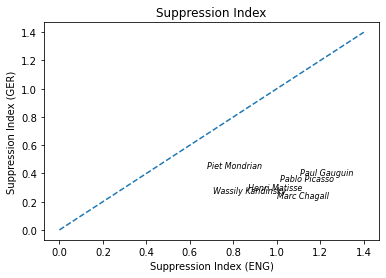

In [76]:
import numpy as np
for x in Sup_index.T:
    plt.annotate(x, Sup_index.loc[x].values, style='italic', size=8)
plt.xlabel("Suppression Index (ENG)")
plt.ylabel("Suppression Index (GER)")
plt.title('Suppression Index')
x = np.arange(0,1.5,.1)
plt.plot(x,x,'--')

In [82]:
df1.drop('Decade', axis=1).pct_change()

corpora           ENG                                               \
painter Pablo Picasso Marc Chagall Wassily Kandinsky Henri Matisse   
1900              NaN          NaN               NaN           NaN   
1901        -0.200000    -0.200000         -0.200000     -0.200000   
1902         1.096932     5.083362         -0.166667      0.461461   
1903        -0.106094    -0.142857         -0.142857     -0.100248   
1904        -0.206003    -0.103498          0.705874      0.155971   
...               ...          ...               ...           ...   
1956         0.060431     0.059100          0.084662      0.010866   
1957         0.072659     0.140237          0.145909      0.079615   
1958         0.043454     0.052661          0.070695      0.023934   
1959         0.027826     0.076852          0.089424      0.042216   
1960         0.070825     0.042178          0.109845      0.050330   

corpora                                      GER               \
painter Paul Gauguin Piet Mondrian Pablo Picasso Marc Chagall   
1900             NaN           NaN           NaN          NaN   
1901        0.220202           NaN     -0.200000    -0.200000   
1902        0.698100           inf     -0.166667    -0.166667   
1903       -0.008226     -0.142857     -0.142857    -0.142857   
1904        0.049367      0.000000     -0.514409    -1.000000   
...              ...           ...           ...          ...   
1956        0.084405      0.087117      0.074231     0.191815   
1957        0.073664      0.145544      0.037201     0.114810   
1958        0.023478      0.072033      0.038771     0.076080   
1959        0.028681      0.054911      0.038053     0.095540   
1960       -0.143493      0.028276     -0.113853     0.109780   

corpora                                                             
painter Wassily Kandinsky Henri Matisse Paul Gauguin Piet Mondrian  
1900                  NaN           NaN          NaN           NaN  
1901            -0.081034     -0.200000     6.294970           NaN  
1902             0.097512     -0.166667    -0.085916           NaN  
1903            -0.104714      1.832566     0.697058           NaN  
1904             0.042307      0.923377     0.593862           NaN  
...                   ...           ...          ...           ...  
1956             0.318809      0.110991     0.117166      0.205104  
1957             0.100198      0.122711     0.205394      0.146748  
1958             0.040702     -0.000253     0.061942      0.073821  
1959             0.094839      0.020090     0.045855      0.035824  
1960             0.046920      0.003234     0.067475      0.016202  

[61 rows x 12 columns]

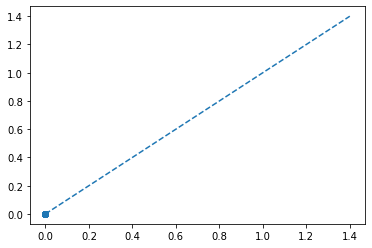

In [118]:
x = np.arange(0,1.5,.1)
plt.plot(x,x,'--')
plt.scatter(df1['ENG'],df1['GER'])

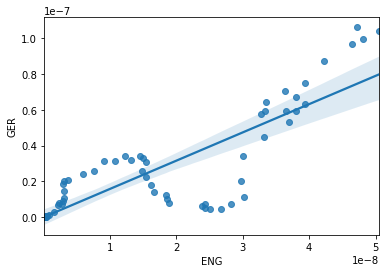

In [142]:
import seaborn as sns
sns.regplot(df1.groupby(level='corpora',axis=1).agg('median')['ENG'],df1.groupby(level='corpora',axis=1).agg('median')['GER'])

In [144]:
k = df1.groupby(level='corpora',axis=1).agg('median')
k.corr()

corpora,ENG,GER
corpora,,
ENG,1.000000,0.827667
GER,0.827667,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BCFBC4B2B0>,
      dtype=object)

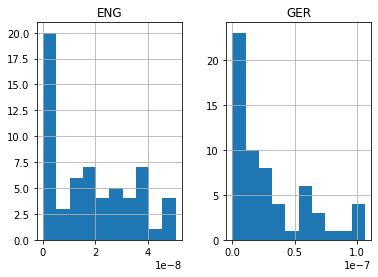

In [145]:
k.hist()

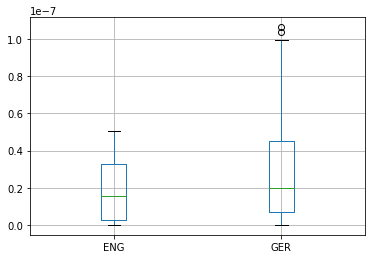

In [147]:
k.boxplot()

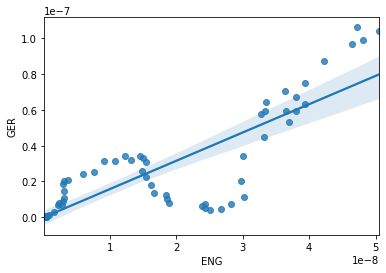

In [150]:
import seaborn as sns
sns.regplot(k['ENG'], k['GER'])

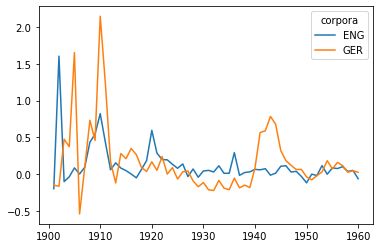

In [153]:
k.pct_change().plot()

In [164]:
df2 = pd.merge(df1,fre, left_index = True, right_index = True)
df2.columns = pd.MultiIndex.from_product([['ENG', 'GER', 'FRA'], 
                                          ['Pablo Picasso','Marc Chagall','Wassily Kandinsky','Henri Matisse','Paul Gauguin','Piet Mondrian']],
                                         names = ['corpora','painter'])
df2

C:\Users\User\anaconda3\lib\site-packages\pandas\core\reshape\merge.py:618: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


corpora           ENG                                                \
painter Pablo Picasso  Marc Chagall Wassily Kandinsky Henri Matisse   
1900     2.453135e-10  1.226279e-10      3.088335e-11  3.036890e-10   
1901     1.962508e-10  9.810233e-11      2.470668e-11  2.429512e-10   
1902     4.115246e-10  5.967920e-10      2.058890e-11  3.550638e-10   
1903     3.678643e-10  5.115360e-10      1.764763e-11  3.194693e-10   
1904     2.920831e-10  4.585931e-10      3.010464e-11  3.692974e-10   
...               ...           ...               ...           ...   
1956     8.167826e-08  3.333030e-08      1.769535e-08  5.242140e-08   
1957     8.761289e-08  3.800443e-08      2.027726e-08  5.659492e-08   
1958     9.142000e-08  4.000580e-08      2.171076e-08  5.794948e-08   
1959     9.396382e-08  4.308033e-08      2.365222e-08  6.039588e-08   
1960     1.006188e-07  4.489735e-08      2.625029e-08  6.343563e-08   

corpora                                       GER                \
painter  Paul Gauguin Piet Mondrian Pablo Picasso  Marc Chagall   
1900     2.711678e-10  0.000000e+00  2.875549e-10  1.479207e-10   
1901     3.308794e-10  0.000000e+00  2.300439e-10  1.183366e-10   
1902     5.618662e-10  3.815111e-11  1.917033e-10  9.861383e-11   
1903     5.572443e-10  3.270095e-11  1.643171e-10  8.452614e-11   
1904     5.847536e-10  3.270095e-11  7.979094e-11  0.000000e+00   
...               ...           ...           ...           ...   
1956     5.123033e-08  1.862868e-08  1.683209e-07  1.298531e-07   
1957     5.500416e-08  2.133998e-08  1.745827e-07  1.447616e-07   
1958     5.629554e-08  2.287716e-08  1.813513e-07  1.557751e-07   
1959     5.791014e-08  2.413338e-08  1.882522e-07  1.706578e-07   
1960     4.960043e-08  2.481577e-08  1.668192e-07  1.893926e-07   

corpora                                                              \
painter Wassily Kandinsky Henri Matisse  Paul Gauguin Piet Mondrian   
1900         1.593368e-09  1.396341e-10  2.626670e-10  0.000000e+00   
1901         1.464251e-09  1.117073e-10  1.916148e-09  0.000000e+00   
1902         1.607033e-09  9.308943e-11  1.751519e-09  0.000000e+00   
1903         1.438754e-09  2.636819e-10  2.972430e-09  0.000000e+00   
1904         1.499623e-09  5.071596e-10  4.737644e-09  0.000000e+00   
...                   ...           ...           ...           ...   
1956         7.416429e-08  1.002349e-07  6.738291e-08  3.828135e-08   
1957         8.159537e-08  1.125348e-07  8.122296e-08  4.389905e-08   
1958         8.491643e-08  1.125064e-07  8.625405e-08  4.713973e-08   
1959         9.296983e-08  1.147666e-07  9.020925e-08  4.882844e-08   
1960         9.733196e-08  1.151377e-07  9.629616e-08  4.961954e-08   

corpora           FRA                                                \
painter Pablo Picasso  Marc Chagall Wassily Kandinsky Henri Matisse   
1900     2.624756e-10  0.000000e+00      0.000000e+00  1.742823e-09   
1901     2.099805e-10  0.000000e+00      0.000000e+00  8.381271e-09   
1902     4.330217e-10  8.601265e-11      0.000000e+00  1.068294e-08   
1903     3.711614e-10  7.372513e-11      0.000000e+00  1.408052e-08   
1904     3.711614e-10  7.372513e-11      0.000000e+00  2.238254e-08   
...               ...           ...               ...           ...   
1956     1.705370e-07  7.081075e-08      1.393688e-08  2.158536e-07   
1957     1.822359e-07  8.059566e-08      1.403471e-08  2.176513e-07   
1958     1.902946e-07  8.897913e-08      1.539658e-08  2.027836e-07   
1959     1.953162e-07  1.007682e-07      1.566021e-08  2.057978e-07   
1960     1.970511e-07  1.133146e-07      1.063609e-08  1.545558e-07   

corpora                              
painter  Paul Gauguin Piet Mondrian  
1900     4.615933e-08  1.397185e-10  
1901     4.789170e-08  1.117748e-10  
1902     4.524253e-08  9.314565e-11  
1903     5.840070e-08  7.983913e-11  
1904     6.027716e-08  7.983913e-11  
...               ...           ...  
1956     1.433387e-07  2.550798e-08  
1957     1.393

Text(0, 0.5, 'Median Regularity')

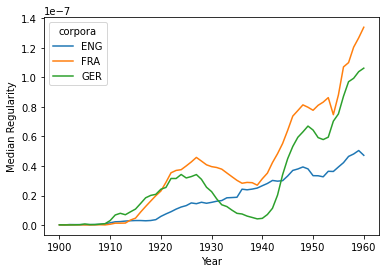

In [165]:
df2.groupby(level='corpora',axis=1).agg('median').plot()
plt.xlabel('Year')
plt.ylabel('Median Regularity')

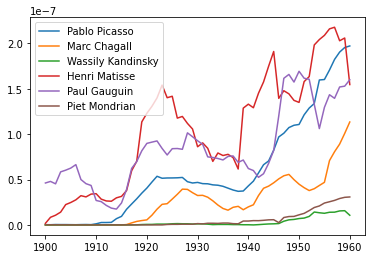

In [167]:
fre.plot()

In [168]:
p = df2.groupby(level='corpora',axis=1).agg('median')
p.corr()

corpora,ENG,FRA,GER
corpora,,,
ENG,1.000000,0.939880,0.827667
FRA,0.939880,1.000000,0.954235
GER,0.827667,0.954235,1.000000


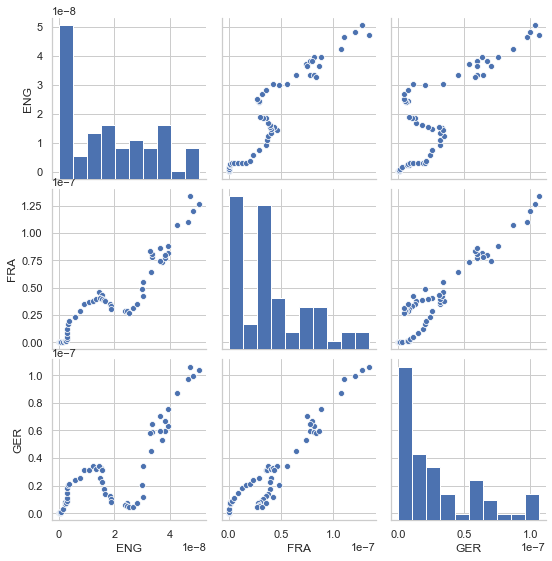

In [170]:
import seaborn as sns
sns.set(style= 'whitegrid', context = 'notebook')
sns.pairplot(p, height=2.5)
plt.show()

In [178]:
spa = GoogleNgrams(painters,1900, 1960, 'spa_2019')
spa.shape

(61, 6)

In [179]:
spa.head()

,Pablo Picasso,Marc Chagall,Wassily Kandinsky,Henri Matisse,Paul Gauguin,Piet Mondrian
1900,6.736682e-10,6.736682e-10,0.0,0.0,6.736682e-10,0.0
1901,5.389345e-10,5.389345e-10,0.0,0.0,1.109583e-09,0.0
1902,8.422341e-10,4.491121e-10,0.0,0.0,6.428360e-09,0.0
1903,7.219149e-10,3.849532e-10,0.0,0.0,5.510023e-09,0.0
1904,8.404505e-10,0.000000e+00,0.0,0.0,5.125070e-09,0.0


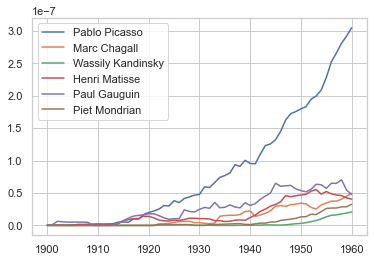

In [180]:
spa.plot()

In [181]:
df3 = pd.merge(df1,spa, left_index = True, right_index = True)
df3.columns = pd.MultiIndex.from_product([['ENG', 'GER', 'SPA'], 
                                          ['Pablo Picasso','Marc Chagall','Wassily Kandinsky','Henri Matisse','Paul Gauguin','Piet Mondrian']],
                                         names = ['corpora','painter'])
df3

C:\Users\User\anaconda3\lib\site-packages\pandas\core\reshape\merge.py:618: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


corpora           ENG                                                \
painter Pablo Picasso  Marc Chagall Wassily Kandinsky Henri Matisse   
1900     2.453135e-10  1.226279e-10      3.088335e-11  3.036890e-10   
1901     1.962508e-10  9.810233e-11      2.470668e-11  2.429512e-10   
1902     4.115246e-10  5.967920e-10      2.058890e-11  3.550638e-10   
1903     3.678643e-10  5.115360e-10      1.764763e-11  3.194693e-10   
1904     2.920831e-10  4.585931e-10      3.010464e-11  3.692974e-10   
...               ...           ...               ...           ...   
1956     8.167826e-08  3.333030e-08      1.769535e-08  5.242140e-08   
1957     8.761289e-08  3.800443e-08      2.027726e-08  5.659492e-08   
1958     9.142000e-08  4.000580e-08      2.171076e-08  5.794948e-08   
1959     9.396382e-08  4.308033e-08      2.365222e-08  6.039588e-08   
1960     1.006188e-07  4.489735e-08      2.625029e-08  6.343563e-08   

corpora                                       GER                \
painter  Paul Gauguin Piet Mondrian Pablo Picasso  Marc Chagall   
1900     2.711678e-10  0.000000e+00  2.875549e-10  1.479207e-10   
1901     3.308794e-10  0.000000e+00  2.300439e-10  1.183366e-10   
1902     5.618662e-10  3.815111e-11  1.917033e-10  9.861383e-11   
1903     5.572443e-10  3.270095e-11  1.643171e-10  8.452614e-11   
1904     5.847536e-10  3.270095e-11  7.979094e-11  0.000000e+00   
...               ...           ...           ...           ...   
1956     5.123033e-08  1.862868e-08  1.683209e-07  1.298531e-07   
1957     5.500416e-08  2.133998e-08  1.745827e-07  1.447616e-07   
1958     5.629554e-08  2.287716e-08  1.813513e-07  1.557751e-07   
1959     5.791014e-08  2.413338e-08  1.882522e-07  1.706578e-07   
1960     4.960043e-08  2.481577e-08  1.668192e-07  1.893926e-07   

corpora                                                              \
painter Wassily Kandinsky Henri Matisse  Paul Gauguin Piet Mondrian   
1900         1.593368e-09  1.396341e-10  2.626670e-10  0.000000e+00   
1901         1.464251e-09  1.117073e-10  1.916148e-09  0.000000e+00   
1902         1.607033e-09  9.308943e-11  1.751519e-09  0.000000e+00   
1903         1.438754e-09  2.636819e-10  2.972430e-09  0.000000e+00   
1904         1.499623e-09  5.071596e-10  4.737644e-09  0.000000e+00   
...                   ...           ...           ...           ...   
1956         7.416429e-08  1.002349e-07  6.738291e-08  3.828135e-08   
1957         8.159537e-08  1.125348e-07  8.122296e-08  4.389905e-08   
1958         8.491643e-08  1.125064e-07  8.625405e-08  4.713973e-08   
1959         9.296983e-08  1.147666e-07  9.020925e-08  4.882844e-08   
1960         9.733196e-08  1.151377e-07  9.629616e-08  4.961954e-08   

corpora           SPA                                                \
painter Pablo Picasso  Marc Chagall Wassily Kandinsky Henri Matisse   
1900     6.736682e-10  6.736682e-10      0.000000e+00  0.000000e+00   
1901     5.389345e-10  5.389345e-10      0.000000e+00  0.000000e+00   
1902     8.422341e-10  4.491121e-10      0.000000e+00  0.000000e+00   
1903     7.219149e-10  3.849532e-10      0.000000e+00  0.000000e+00   
1904     8.404505e-10  0.000000e+00      0.000000e+00  0.000000e+00   
...               ...           ...               ...           ...   
1956     2.523903e-07  3.751048e-08      1.560697e-08  4.870264e-08   
1957     2.659274e-07  3.751903e-08      1.634754e-08  4.692339e-08   
1958     2.808991e-07  4.038572e-08      1.775517e-08  4.608962e-08   
1959     2.919298e-07  4.504247e-08      1.902594e-08  4.253809e-08   
1960     3.048274e-07  4.942898e-08      2.098186e-08  4.044278e-08   

corpora                              
painter  Paul Gauguin Piet Mondrian  
1900     6.736682e-10  0.000000e+00  
1901     1.109583e-09  0.000000e+00  
1902     6.428360e-09  0.000000e+00  
1903     5.510023e-09  0.000000e+00  
1904     5.125070e-09  0.000000e+00  
...               ...           ...  
1956     6.498393e-08  2.680302e-08  
1957     6.485

Text(0, 0.5, 'Median Regularity')

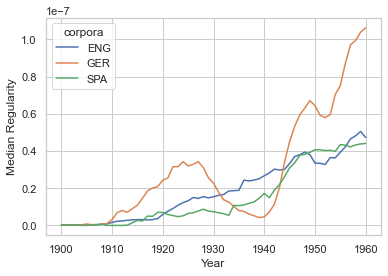

In [182]:
df3.groupby(level='corpora',axis=1).agg('median').plot()
plt.xlabel('Year')
plt.ylabel('Median Regularity')

In [183]:
t = df3.groupby(level='corpora',axis=1).agg('median')
t.corr()

corpora,ENG,GER,SPA
corpora,,,
ENG,1.000000,0.827667,0.944498
GER,0.827667,1.000000,0.893681
SPA,0.944498,0.893681,1.000000


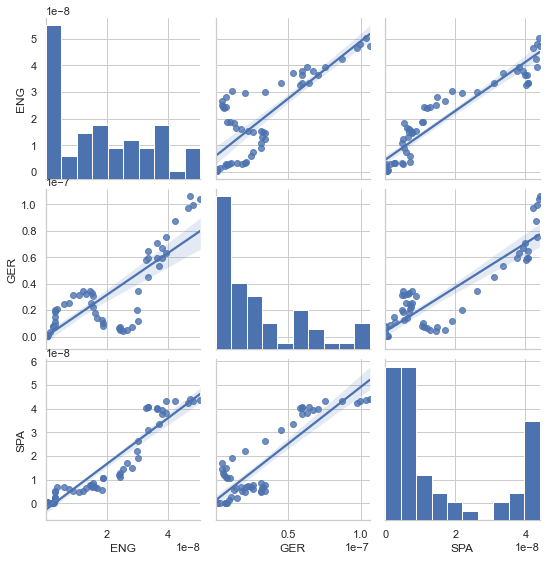

In [185]:
import seaborn as sns
sns.set(style= 'whitegrid', context = 'notebook')
sns.pairplot(t, height=2.5, kind="reg")
plt.show()